## 0. Taula de Contiguts

- [EDA](#1.-EDA-(Exploratory-Data-Analysis))
  - [Anàlisi estadístic bàsic](#1.1-Anàlisi-estadístic-bàsic)
  

In [101]:
#%pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, f1_score, recall_score, confusion_matrix
from sklearn.svm import SVC

## 1. EDA (Exploratory Data Analysis)

In [102]:
# Configuració visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Càrrega de dades
# Assegura't que el fitxer 'trs_train.csv' està al mateix directori
df = pd.read_csv('trs_train.csv')

print(f"Dimensions del dataset: {df.shape}")
display(df.head())

Dimensions del dataset: (9000, 28)


,patient_id,Age,Sex,Ethnicity,Duration_untreated_psychosis,Family_history,Initial_response,Lymphocyte_count,Neutrophil_count,BMI,...,Polygenic_risk_score,Del_22q11_2_status,IL_17A,CCL23,TWEAK,Ki_whole_striatum,Ki_associative_striatum,SUVRc_whole_striatum,SUVRc_associative_striatum,TRS
0,1,28.0,1,Caucasian,7.5,1,24.7,2.35,NaN,31.2,...,0.330,0,2.76,5.66,4.47,0.01147,0.01082,1.225,1.133,0
1,2,23.0,1,Asian,3.6,1,41.0,2.02,3.34,26.2,...,0.121,0,2.04,2.67,1.93,0.01386,0.01437,1.042,1.502,0
2,3,29.0,1,Caucasian,7.4,0,6.0,NaN,5.38,39.2,...,-0.098,0,1.55,2.31,2.92,0.01589,0.01632,1.728,1.842,0
3,4,36.0,0,Hispanic,5.5,0,43.4,1.60,6.84,31.5,...,0.019,0,1.77,2.37,4.26,0.01178,0.01154,1.399,1.249,0
4,5,23.0,0,Caucasian,4.5,0,86.1,NaN,3.18,29.6,...,-0.049,0,2.11,3.55,3.84,0.01209,0.01171,0.800,1.533,0


### 1.1 Anàlisi estadístic bàsic
Generem taula descriptiva amb estadístiques bàsiques i taxa de valors perduts per a cada variable. 

In [ ]:
stats_desc = df.describe().T
stats_desc['missing_rate'] = df.isnull().mean()
display(stats_desc)

,count,mean,std,min,25%,50%,75%,max,missing_rate
patient_id,9000.0,4500.500000,2598.220545,1.00000,2250.75000,4500.50000,6750.25000,9000.000,0.000000
Age,9000.0,26.039444,10.011767,13.00000,19.00000,25.00000,31.00000,64.000,0.000000
Sex,9000.0,0.576000,0.494218,0.00000,0.00000,1.00000,1.00000,1.000,0.000000
Duration_untreated_psychosis,8872.0,19.220548,19.545745,0.30000,6.40000,12.50000,24.30000,125.000,0.014222
Family_history,9000.0,0.118778,0.323545,0.00000,0.00000,0.00000,0.00000,1.000,0.000000
Initial_response,9000.0,41.840367,30.160230,0.00000,10.10000,38.20000,72.30000,100.000,0.000000
Lymphocyte_count,7009.0,1.795761,0.601099,0.50000,1.38000,1.80000,2.20000,4.020,0.221222
Neutrophil_count,7015.0,5.014574,1.471581,1.50000,4.00500,5.02000,6.01000,9.960,0.220556
BMI,9000.0,28.107556,5.433100,15.00000,24.40000,28.00000,31.70000,49.600,0.000000
Triglycerides,6547.0,152.012800,61.099018,40.00000,108.05000,151.10000,194.60000,394.600,0.272556


Desbalanceig de la classe objectiu (TRS).



In [104]:
ratio_trs = df['TRS'].value_counts(normalize=True)
print(f"Ratio de classes:\n{ratio_trs}")

Ratio de classes:
TRS
0    0.684667
1    0.315333
Name: proportion, dtype: float64


Plotegem l'histograma de la variable objectiu TRS per visualitzar el desbalanceig de classes.

C:\Users\User\AppData\Local\Temp\ipykernel_10084\2677145478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TRS', data=df, palette='viridis')


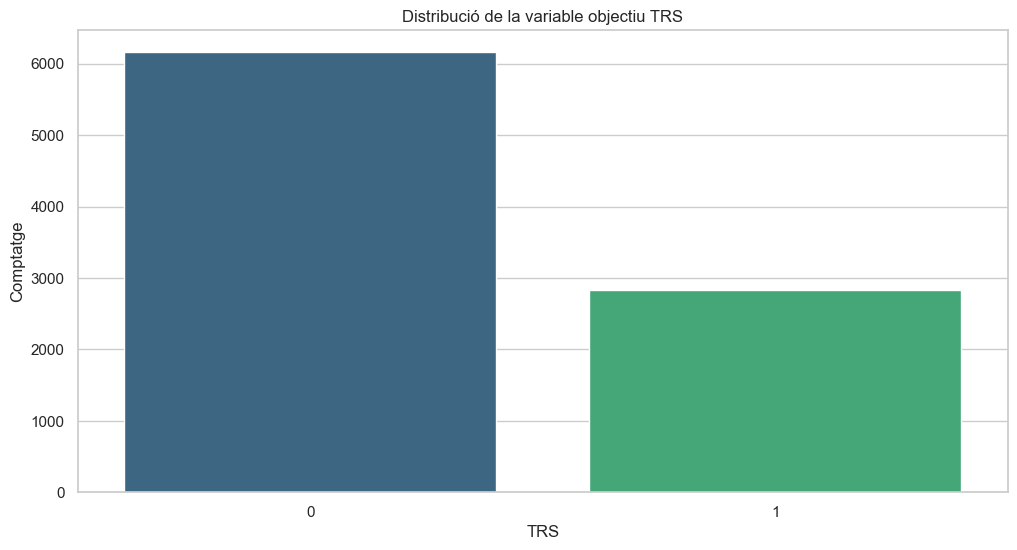

In [105]:
# Visualització de l'histograma de la variable objectiu TRS
plt.figure()
sns.countplot(x='TRS', data=df, palette='viridis')
plt.title('Distribució de la variable objectiu TRS')
plt.xlabel('TRS')
plt.ylabel('Comptatge')
plt.show()

### 1.2 Recodificació de variables

Tenim dues variables categòriques representades amb símbols alfanumèrics que cal recodificar a valors numèrics per facilitar el processament en els models de machine learning. Aquestes són:

- ``Ethnicity``: Recodificarem les diferents categories ètniques a valors numèrics únics.
- ``CYP2D6_metabolic_phenotype``: Aquesta variable indica el fenotip metabòlic i també serà recodificada a valors numèrics.

Mirem quines categories tenim en cada variable:


In [106]:
col_recode = [ "Ethnicity", "CYP2D6_metabolic_phenotype" ]

for col in col_recode:
    print(f"\nCategories a recodificar per la variable '{col}':")
    print(df[col].value_counts())


Categories a recodificar per la variable 'Ethnicity':
Ethnicity
Caucasian    5408
African      1403
Asian        1305
Hispanic      884
Name: count, dtype: int64

Categories a recodificar per la variable 'CYP2D6_metabolic_phenotype':
CYP2D6_metabolic_phenotype
Extensive       6874
Intermediate    1114
Ultrarapid       570
Poor             442
Name: count, dtype: int64


Tenim les següents categories:

Per ``Ethnicity``: `African`, `Asian`, `Caucasian`, `Hispanic`
Per ``CYP2D6_metabolic_phenotype``: `Extensive`, `Intermediate`, `Poor`, `Ultrarapid`

Per recodificar `Ethnicity`, utilitzem una assignació hot-encoding, per no introduir un ordre artificial entre les categories. És a dir, creem una columna binària per a cada categoria ètnica.
Per recodificar `CYP2D6_metabolic_phenotype`, utilitzem una assignació ordinal, ja que hi ha un ordre natural entre els fenotips metabòlics. Assignem valors numèrics de la següent manera:
- Poor: 0
- Intermediate: 1
- Extensive: 2
- Ultrarapid: 3

Recodifiquem les variables al DataFrame:

In [107]:

cyp2d6_mapping = {
    'Poor': 0,
    'Intermediate': 1,
    'Extensive': 2,
    'Ultrarapid': 3
}

if 'CYP2D6_metabolic_phenotype' in df.columns:
    df['CYP2D6_encoded'] = df['CYP2D6_metabolic_phenotype'].map(cyp2d6_mapping)
    df = df.drop('CYP2D6_metabolic_phenotype', axis=1)
    
if 'Ethnicity' in df.columns:
    ethnicity_dummies = pd.get_dummies(df['Ethnicity'], prefix='is', dtype=int)
    df = pd.concat([df, ethnicity_dummies], axis=1)
    df = df.drop('Ethnicity', axis=1)
display(df.head(3))


,patient_id,Age,Sex,Duration_untreated_psychosis,Family_history,Initial_response,Lymphocyte_count,Neutrophil_count,BMI,Triglycerides,...,Ki_whole_striatum,Ki_associative_striatum,SUVRc_whole_striatum,SUVRc_associative_striatum,TRS,CYP2D6_encoded,is_African,is_Asian,is_Caucasian,is_Hispanic
0,1,28.0,1,7.5,1,24.7,2.35,NaN,31.2,230.6,...,0.01147,0.01082,1.225,1.133,0,2,0,0,1,0
1,2,23.0,1,3.6,1,41.0,2.02,3.34,26.2,58.9,...,0.01386,0.01437,1.042,1.502,0,2,0,1,0,0
2,3,29.0,1,7.4,0,6.0,NaN,5.38,39.2,NaN,...,0.01589,0.01632,1.728,1.842,0,1,0,0,1,0


### 1.3 Particionat

Cal particionar el dataset en train i test abans de fer qualsevol tipus de preprocessament per evitar data leakage. Utilitzem un 80% per a train i 20% per a test, assegurant-nos que la distribució de la variable objectiu (TRS) es manté en ambdós conjunts mitjançant estratificació.

In [108]:
from sklearn.model_selection import train_test_split

X = df.drop('TRS', axis=1)
y = df['TRS']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

partition_data = {
    'Partició': ['Train', 'Validació', 'Total'],
    'N': [len(y_train), len(y_val), len(y)],
    '%': [f"{len(y_train)/len(y)*100:.0f}%", f"{len(y_val)/len(y)*100:.0f}%", "100%"],
    'TRS=1': [y_train.sum(), y_val.sum(), y.sum()],
    'Prop. TRS=1': [f"{y_train.mean():.1%}", f"{y_val.mean():.1%}", f"{y.mean():.1%}"]
}

display(pd.DataFrame(partition_data))


,Partició,N,%,TRS=1,Prop. TRS=1
0,Train,7200,80%,2270,31.5%
1,Validació,1800,20%,568,31.6%
2,Total,9000,100%,2838,31.5%


### 1.4 Missing Values i Imputació

In [116]:
# Calculem missings totals i percentatge
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Creem un DataFrame resum només amb les variables que tenen missings
missing_df = pd.DataFrame({
    'Total Missings': missing_data, 
    'Percentatge (%)': missing_percent
})

# Filtrem per mostrar només les que tenen algun missing i ordenem
missing_df = missing_df[missing_df['Total Missings'] > 0].sort_values(by='Percentatge (%)', ascending=False)

print("--- Resum de Valors Perduts ---")
if not missing_df.empty:
    display(missing_df.style.background_gradient(cmap='Reds'))
else:
    print("No queden valors perduts al dataset!")


--- Resum de Valors Perduts ---


,Total Missings,Percentatge (%)
Alkaline_phosphatase,2938,32.644444
Glucose,2619,29.100000
Triglycerides,2453,27.255556
Lymphocyte_count,1991,22.122222
Neutrophil_count,1985,22.055556
Duration_untreated_psychosis,128,1.422222
Polygenic_risk_score,1,0.011111
IL_17A,1,0.011111


Les variables amb valors perduts són

- ``Lymphocyte_count``
- ``Neutrophil_count``
- ``Triglycerides``
- ``Glucose``
- ``Alkaline_phosphatase``
- ``Duration_untreated_psychosis``
- ``Polygenic_risk_score``
- ``IL_17A``

Intenem visualitzar la distribució de les variables:



Generant gràfics per a 8 variables...



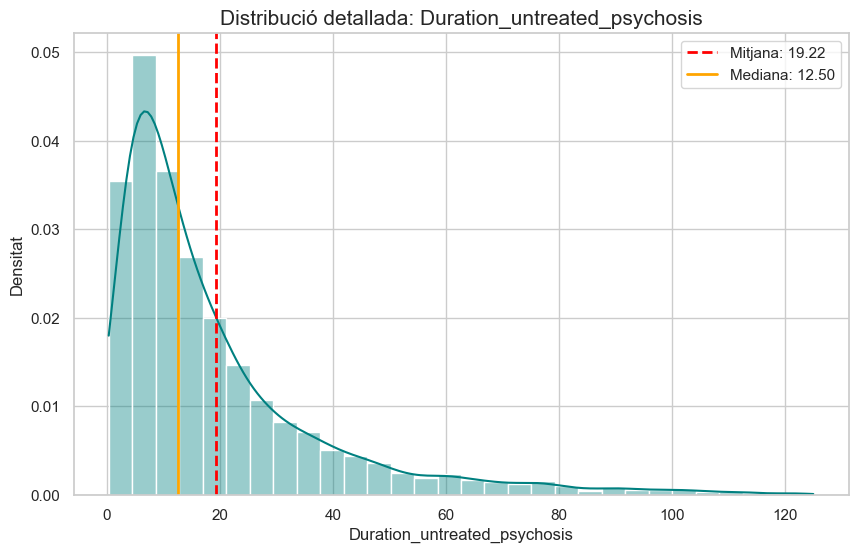

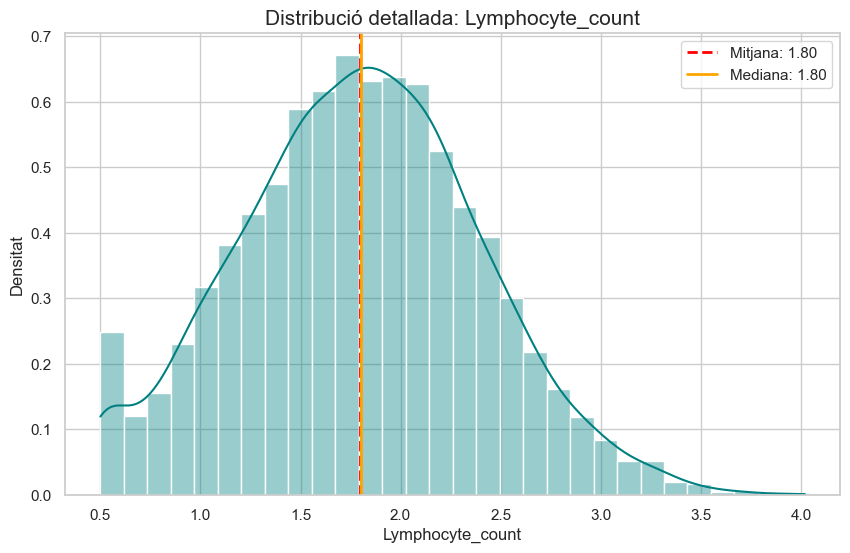

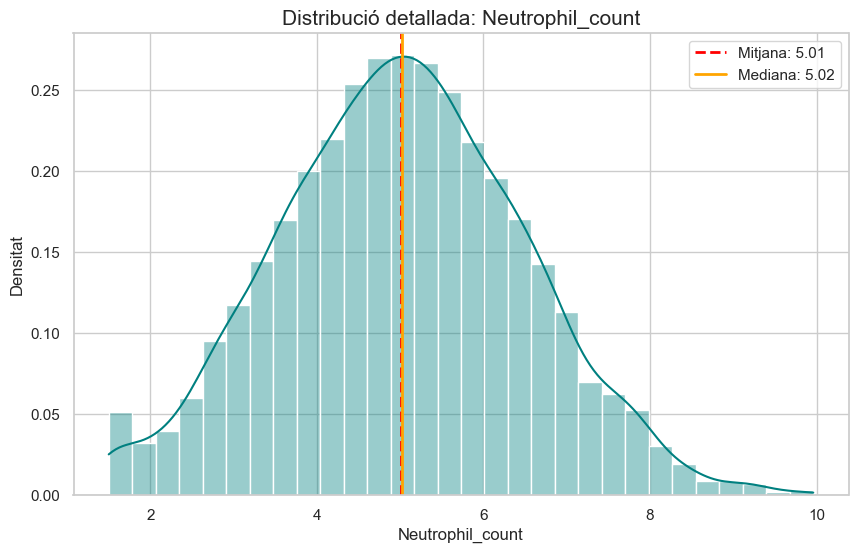

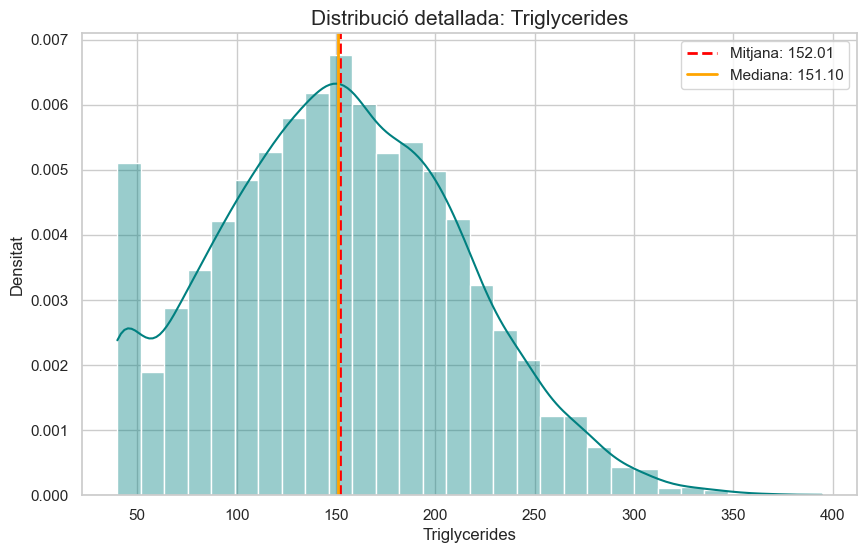

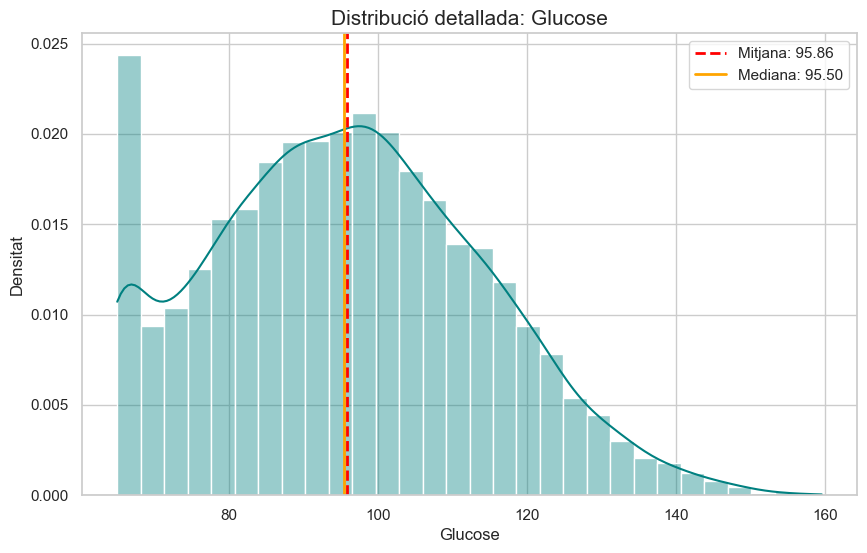

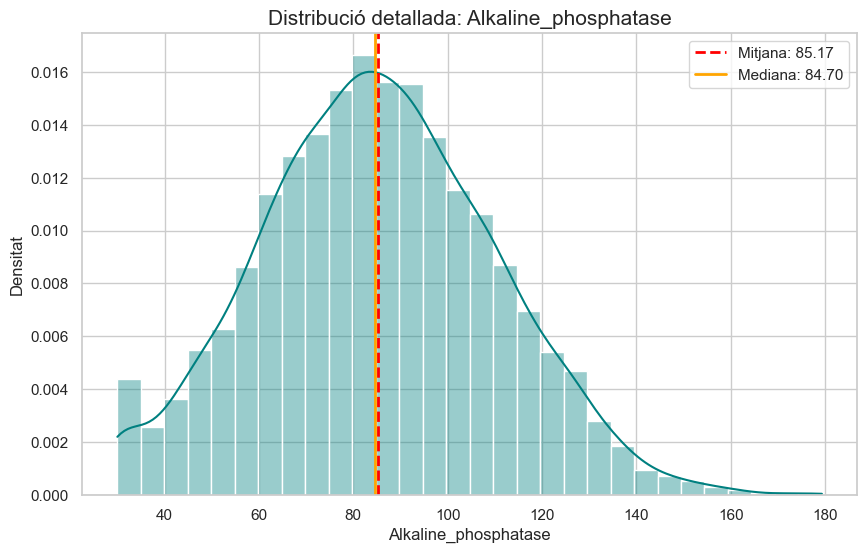

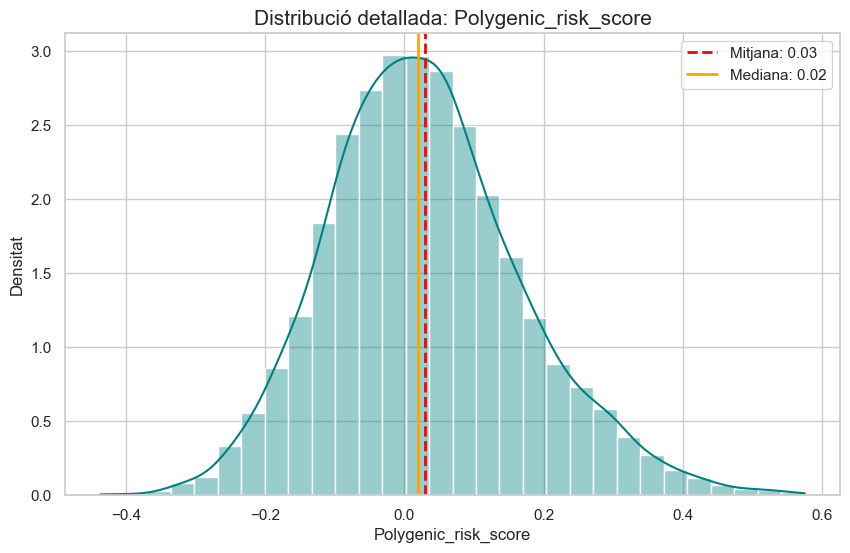

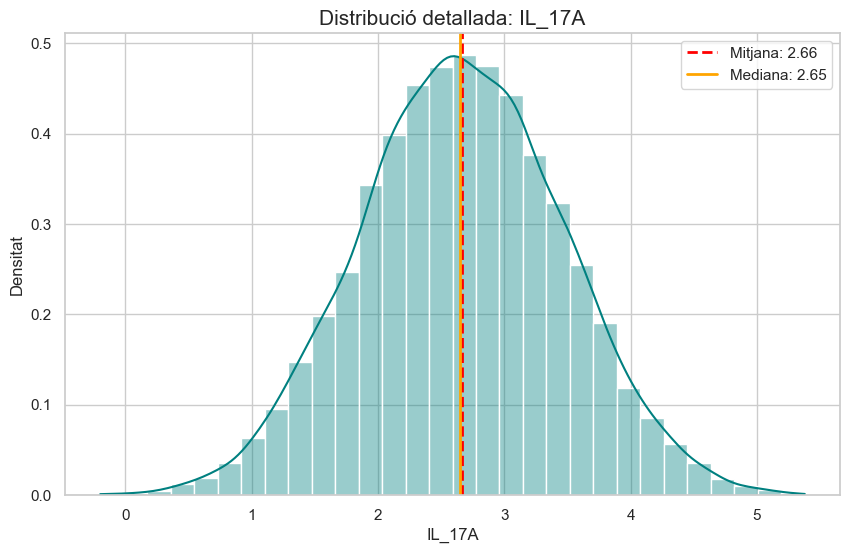

In [110]:
# Identifiquem columnes que encara tenen missings
cols_missing = [col for col in df.columns if df[col].isnull().any()]

print(f"Generant gràfics per a {len(cols_missing)} variables...\n")

for col in cols_missing:
    # Creem una figura NOVA per a cada variable (mida gran 10x6)
    plt.figure(figsize=(10, 6))
    
    # Histograma amb línia de densitat (KDE)
    sns.histplot(df[col].dropna(), kde=True, stat="density", color='teal', bins=30, alpha=0.4)
    
    # Calculem valors per pintar les línies
    val_mitjana = df[col].mean()
    val_mediana = df[col].median()
    
    # Línies per mitjana i mediana per referència
    plt.axvline(val_mitjana, color='red', linestyle='--', linewidth=2, label=f'Mitjana: {val_mitjana:.2f}')
    plt.axvline(val_mediana, color='orange', linestyle='-', linewidth=2, label=f'Mediana: {val_mediana:.2f}')
    
    plt.title(f'Distribució detallada: {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Densitat')
    plt.legend()
    
    # Mostrem el gràfic individualment
    plt.show()


Ens semblen que siguin normals (excepte ``Duration_untreated_psychosis``, gesitonem més endavant), però fem la prova de normalitat de Shapiro-Wilk per assegurar-nos.

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7009.
  res = hypotest_fun_out(*samples, **kwds)


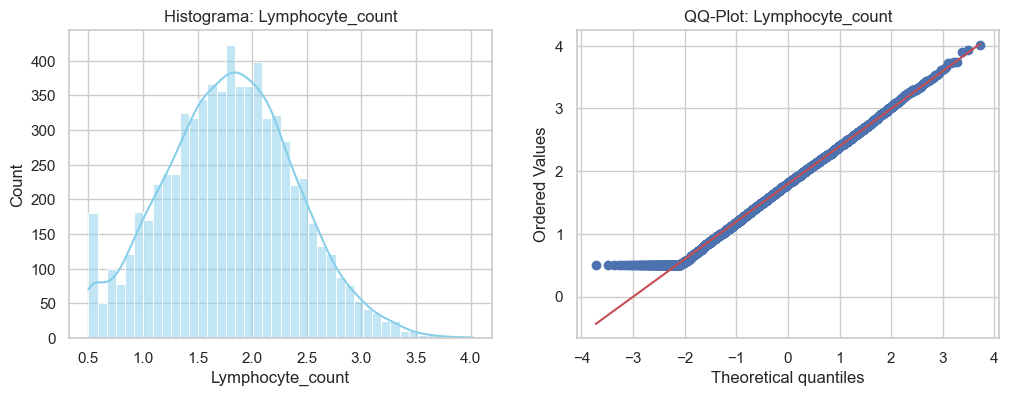

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7015.
  res = hypotest_fun_out(*samples, **kwds)


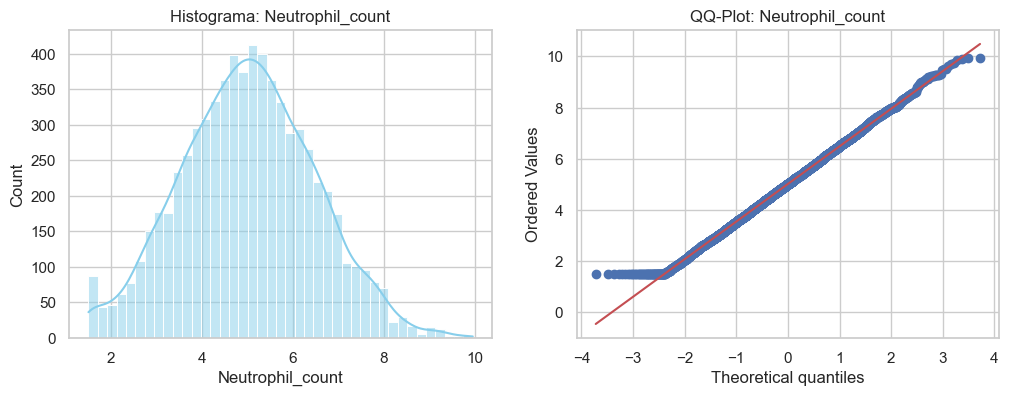

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6547.
  res = hypotest_fun_out(*samples, **kwds)


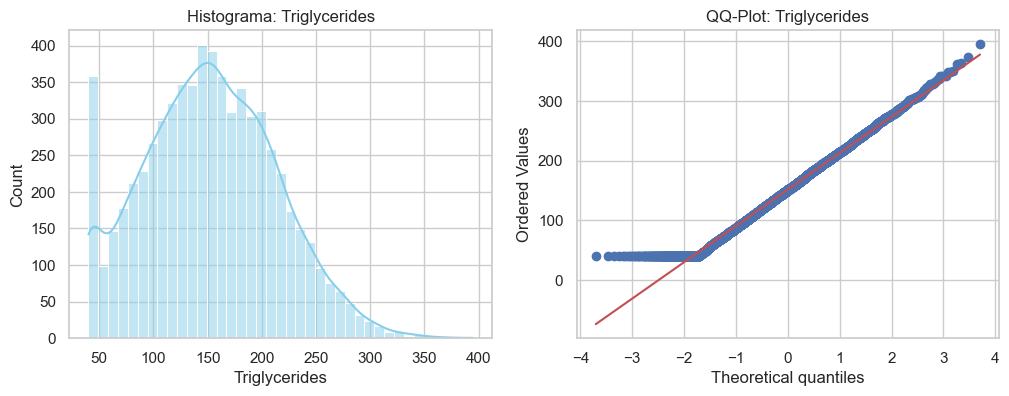

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6381.
  res = hypotest_fun_out(*samples, **kwds)


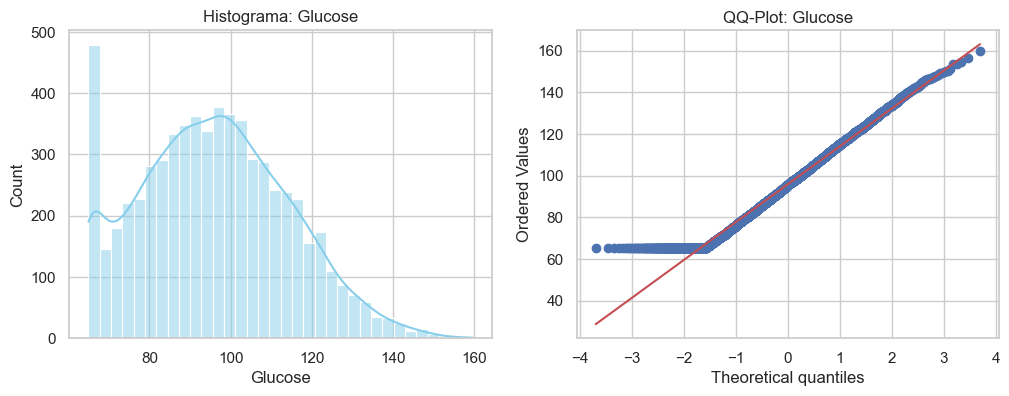

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6062.
  res = hypotest_fun_out(*samples, **kwds)


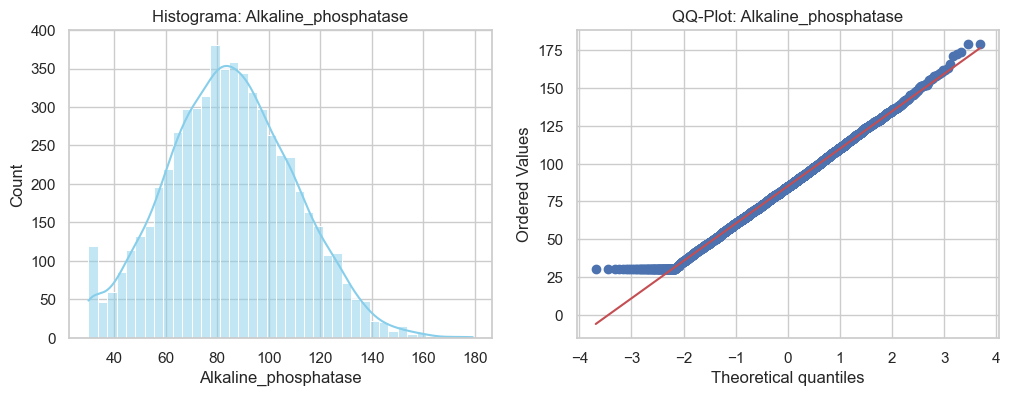

--- ANÀLISI DE NORMALITAT ---


,Variable,Test,p-value,Skewness,Conclusió
0,Lymphocyte_count,Shapiro-Wilk,0.0000,0.08,Aproximadament Simètrica (però no Normal)
1,Neutrophil_count,Shapiro-Wilk,0.0000,0.07,Aproximadament Simètrica (però no Normal)
2,Triglycerides,Shapiro-Wilk,0.0000,0.19,Aproximadament Simètrica (però no Normal)
3,Glucose,Shapiro-Wilk,0.0000,0.24,Aproximadament Simètrica (però no Normal)
4,Alkaline_phosphatase,Shapiro-Wilk,0.0000,0.13,Aproximadament Simètrica (però no Normal)


In [111]:
import scipy.stats as stats


cols = ["Lymphocyte_count", "Neutrophil_count","Triglycerides","Glucose","Alkaline_phosphatase"]


results = []

for col in cols:
    # Netegem NaNs per al test
    data = df[col].dropna()
    
    stat, p_value = stats.shapiro(data)
    
    is_normal = p_value > 0.05
    dist_type = "Normal (Gaussiana)" if is_normal else "NO Normal (Esbiaixada/Altre)"
    
    skew = data.skew()
    if not is_normal:
        if skew > 1: dist_type = "Molt Esbiaixada a la Dreta (Log-Normal?)"
        elif skew < -1: dist_type = "Molt Esbiaixada a l'Esquerra"
        elif abs(skew) <= 1: dist_type = "Aproximadament Simètrica (però no Normal)"

    results.append({
        'Variable': col,
        'Test': "Shapiro-Wilk",
        'p-value': f"{p_value:.4f}", # Format científic si calgués
        'Skewness': f"{skew:.2f}",
        'Conclusió': dist_type
    })
    
    # --- VISUALITZACIÓ (Opcional: Descomenta per veure gràfics un a un) ---
    
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Histograma + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='skyblue')
    plt.title(f'Histograma: {col}')
    
    # Plot 2: QQ-Plot (Si els punts segueixen la línia vermella = Normal)
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ-Plot: {col}')
    
    plt.show()


# 2. Mostrem la taula de resultats
dist_df = pd.DataFrame(results)
print("--- ANÀLISI DE NORMALITAT ---")
display(dist_df)


Veiem clarament que NO són distribucions normals . Imputem amb KNN per respectar millor la distribució.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


# Columnes que tenen missings
cols_missing = ['Duration_untreated_psychosis', 'Polygenic_risk_score', 
                'IL_17A', 'Alkaline_phosphatase', 'Glucose', 'Lymphocyte_count', 'Neutrophil_count']

# 2. SEGON: Escalar (KNN ho necessita perquè es basa en distàncies)
# IMPORTANT: Fit només sobre TRAIN
scaler = StandardScaler()
scaler.fit(X_train[cols_missing])

# Apliquem l'escalat a les còpies temporals
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[cols_missing] = scaler.transform(X_train[cols_missing])
X_val_scaled[cols_missing] = scaler.transform(X_val[cols_missing])

# 3. TERCER: Imputar (KNN)
# IMPORTANT: Fit només sobre TRAIN (aprèn veïns del train)
knn = KNNImputer(n_neighbors=5)
knn.fit(X_train_scaled[cols_missing])

# Transformem (imputem) usant el coneixement del train
X_train_imputed_vals = knn.transform(X_train_scaled[cols_missing])
X_val_imputed_vals = knn.transform(X_val_scaled[cols_missing])

# 4. QUART: Des-escalar (tornar als valors originals com mg/dL, anys, etc.)
# Això és útil si després vols aplicar logaritmes o si uses XGBoost (que no vol escalat)
X_train.loc[:, cols_missing] = scaler.inverse_transform(X_train_imputed_vals)
X_val.loc[:, cols_missing] = scaler.inverse_transform(X_val_imputed_vals)

# Ara X_train i X_test estan nets, imputats i sense data leakage.


Pel que fa a la Duration_treated_psychosis, apliquem una transformació logarítmica per a reduir el Skewness

In [138]:
#fem la transformació logarítmica a Duration_untreated_psychosis, tant per train com per val
X_train['Duration_untreated_psychosis'] = np.log1p(X_train['Duration_untreated_psychosis'])
X_val['Duration_untreated_psychosis'] = np.log1p(X_val['Duration_untreated_psychosis'])
# Verifiquem que ja no hi ha missings
print("\nVerificació de valors perduts després de la imputació:")
print(X_train.isnull().sum())
print(X_val.isnull().sum())




Verificació de valors perduts després de la imputació:
patient_id                        0
Age                               0
Sex                               0
Duration_untreated_psychosis    132
Family_history                    0
Initial_response                  0
Lymphocyte_count                  0
Neutrophil_count                  0
Glucose                           0
Alkaline_phosphatase              0
Prior_antipsychotics              0
HLA_DRB1_04_02                    0
HLA_B_15_02                       0
HLA_A_31_01                       0
Polygenic_risk_score              0
Del_22q11_2_status                0
IL_17A                            0
CCL23                             0
TWEAK                             0
Ki_whole_striatum                 0
SUVRc_whole_striatum              0
CYP2D6_encoded                    0
is_African                        0
is_Asian                          0
is_Caucasian                      0
is_Hispanic                       0
dtype: i

c:\Users\User\Documents\universitat\2n1q\iaa\practica\clinical-trs-prediction\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 1.5 Outliers

En ser una dataset mèdic, els valors extrems poden tenir un significat clínic important, per tant, no eliminem outliers. Haurem de gestionar-los en la fase de modelatge. Per casos:

- SVM: Modelarem un soft margin per permetre certa flexibilitat amb els outliers.
- XGBoost: Aquest model és robust als outliers, ja que es basa en arbres de decisió que segmenten l'espai de característiques.
- Regressió logística: Tractarem els outliers només si afecten significativament el model, potser utilitzant regularització per minimitzar el seu impacte.

### 1.6 Gestió del desbalanceig de classes

Per gestionar el desbalanceig de classes en la variable objectiu TRS, utilitzarem diferents tècniques segons el model:

- Per a SVM, utilitzarem pesos de classe per penalitzar més els errors en la classe minoritària. Això es fa ajustant el paràmetre `class_weight` a `balanced`: `model = SVC(class_weight='balanced')`
- Per a XGBoost, utilitzarem el paràmetre `scale_pos_weight` per equilibrar les classes. Aquest paràmetre es calcula com la raó entre el nombre de mostres de la classe majoritària i el nombre de mostres de la classe minoritària.
- Per a la regressió logística personalitzada, farem MiniBatch Gradient Descent amb oversampling de la classe minoritària dins de cada batch. Això ajudarà a equilibrar les classes durant l'entrenament sense afectar tot el conjunt de dades.

## 2. Preparació de variables

### 2.1 Normalització de les variables

Per als models SVM i regressió logística, normalitzarem les variables numèriques utilitzant el StandardScaler, que transforma les dades perquè tinguin una mitjana de 0 i una desviació estàndard de 1. Això és important perquè aquests models són sensibles a l'escala de les característiques.

In [119]:
from sklearn.preprocessing import StandardScaler

cols_to_drop = ['Patient_ID', 'id'] 
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_val = X_val.drop(columns=cols_to_drop, errors='ignore')


numeric_cols = ['Age', 'Duration_untreated_psychosis', 'Lymphocyte_count', 
                'Neutrophil_count', 'BMI', 'Glucose', 
                'Alkaline_phosphatase', 'IL_17A', 'CCL23', 'TWEAK', 
                'Ki_whole_striatum', 
                'SUVRc_whole_striatum']


scaler = StandardScaler()



scaler.fit_transform(X_train[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])



### 2.2 Anàlisi de les variables categòriques i objectiu

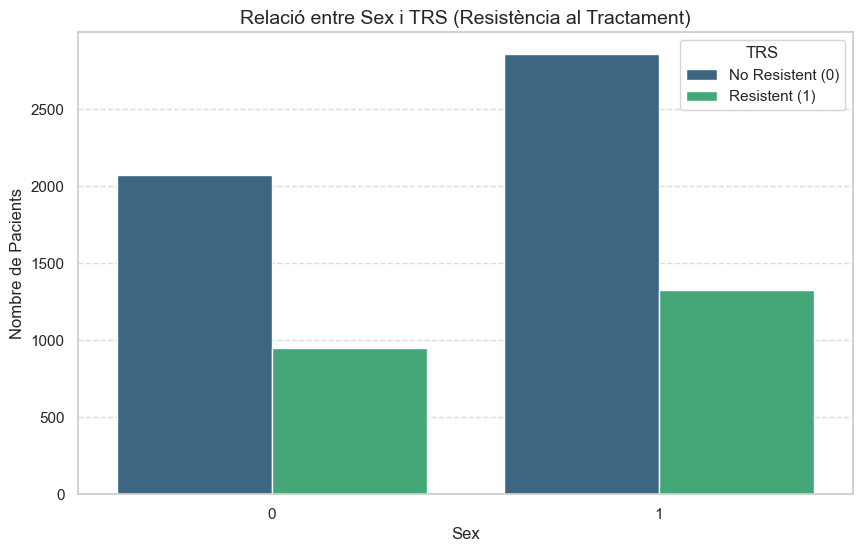

--- Distribució Percentual per Sex ---


,% No TRS,% TRS
Sex,,
0,68.64,31.36
1,68.35,31.65


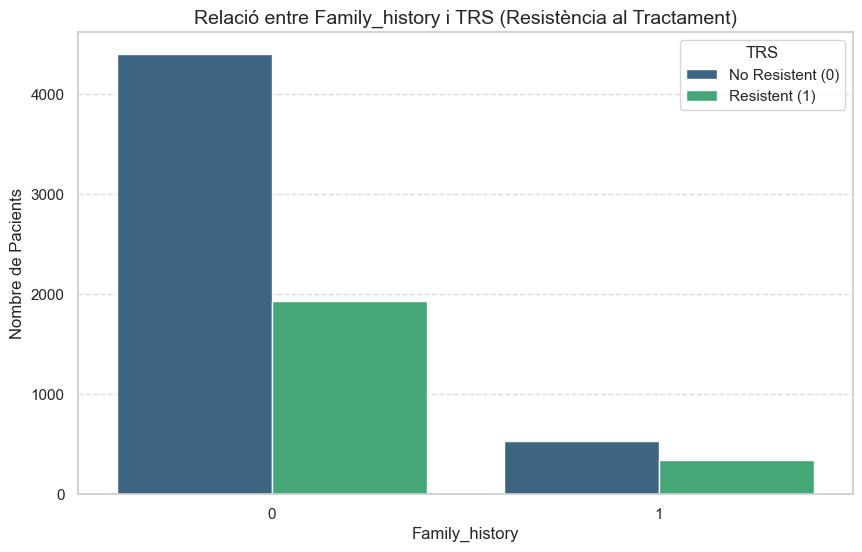

--- Distribució Percentual per Family_history ---


,% No TRS,% TRS
Family_history,,
0,69.47,30.53
1,61.20,38.80


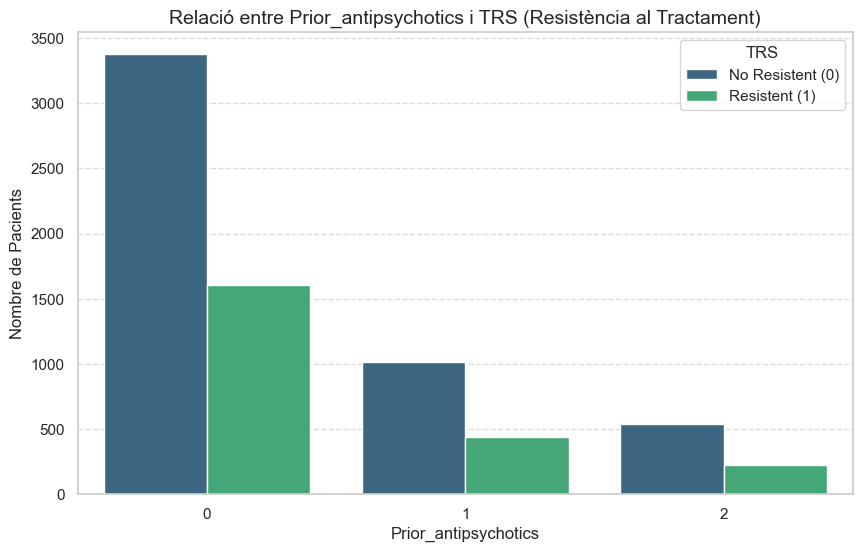

--- Distribució Percentual per Prior_antipsychotics ---


,% No TRS,% TRS
Prior_antipsychotics,,
0,67.82,32.18
1,69.75,30.25
2,70.26,29.74


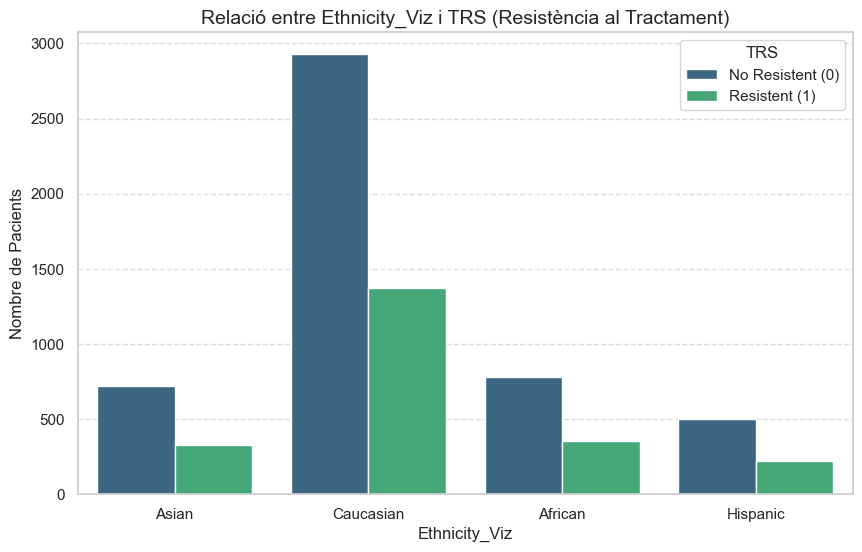

--- Distribució Percentual per Ethnicity_Viz ---


,% No TRS,% TRS
Ethnicity_Viz,,
African,68.82,31.18
Asian,68.90,31.10
Caucasian,68.08,31.92
Hispanic,69.68,30.32


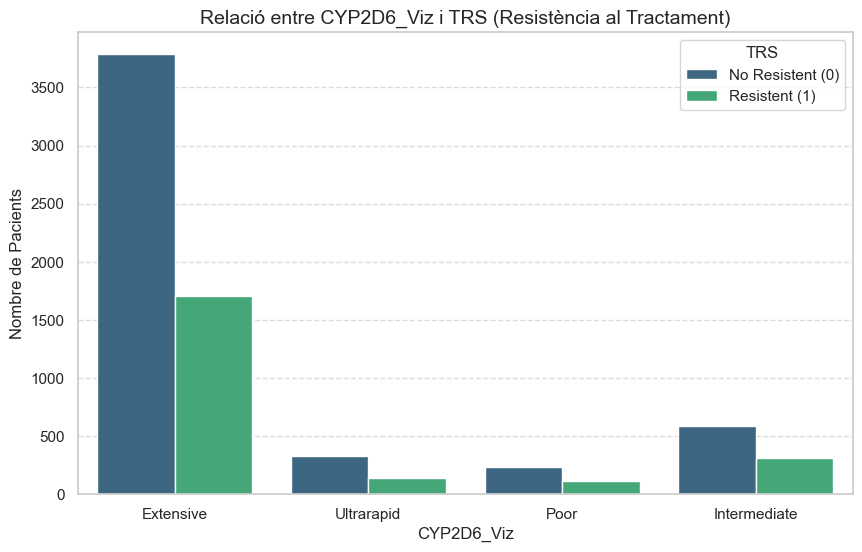

--- Distribució Percentual per CYP2D6_Viz ---


,% No TRS,% TRS
CYP2D6_Viz,,
Extensive,68.94,31.06
Intermediate,65.32,34.68
Poor,67.34,32.66
Ultrarapid,69.87,30.13


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------------------
# 1. Preparar dades per a la visualització
# ---------------------------------------------------------
# Creem un dataframe temporal per fer els gràfics
# Unim X_train i y_train perquè necessitem la target 'TRS'
plot_df = X_train.copy()
plot_df['TRS'] = y_train

# ---------------------------------------------------------
# 2. Reconstruir 'Ethnicity' per visualitzar-la en un sol gràfic
# ---------------------------------------------------------
# Com que ara tens 'is_Asian', 'is_Caucasian', etc., és difícil veure-ho tot junt.
# Fem un truc: desfem el one-hot encoding només per al gràfic.

ethnicity_cols = [col for col in plot_df.columns if col.startswith('is_')]
# Això crearà una columna 'Ethnicity_Reconstructed' amb valors com 'Asian', 'Caucasian'...
# Busquem quina columna té un 1 i n'agafem el nom (treen el prefix 'is_')
plot_df['Ethnicity_Viz'] = plot_df[ethnicity_cols].idxmax(axis=1).apply(lambda x: x.replace('is_', ''))

# ---------------------------------------------------------
# 3. Reconstruir 'CYP2D6' si cal (per posar etiquetes maques en lloc de 0,1,2,3)
# ---------------------------------------------------------
# Fem el mapa invers per tenir els noms al gràfic
cyp2d6_reverse_map = {0: 'Poor', 1: 'Intermediate', 2: 'Extensive', 3: 'Ultrarapid'}
if 'CYP2D6_encoded' in plot_df.columns:
    plot_df['CYP2D6_Viz'] = plot_df['CYP2D6_encoded'].map(cyp2d6_reverse_map)

# ---------------------------------------------------------
# 4. Definir llista de variables a analitzar
# ---------------------------------------------------------
vars_to_analyze = [
    'Sex', 
    'Family_history', 
    'Prior_antipsychotics', 
    'Ethnicity_Viz',    # La versió reconstruïda
    'CYP2D6_Viz'        # La versió amb noms
]

# ---------------------------------------------------------
# 5. Bucle per generar els gràfics automàticament
# ---------------------------------------------------------
for col in vars_to_analyze:
    # Verifiquem que la columna existeix (per seguretat)
    if col in plot_df.columns:
        plt.figure(figsize=(10, 6))
        
        # Countplot: Barres agrupades per TRS
        # hue='TRS' separa les barres en colors diferents segons si és TRS=0 o 1
        sns.countplot(data=plot_df, x=col, hue='TRS', palette='viridis')
        
        plt.title(f'Relació entre {col} i TRS (Resistència al Tractament)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Nombre de Pacients', fontsize=12)
        plt.legend(title='TRS', labels=['No Resistent (0)', 'Resistent (1)'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Mostrar gràfic
        plt.show()
        
        # Taula de percentatges (Molt útil per a l'informe!)
        # Ens diu: "Dins dels Asiàtics, quin % són TRS?"
        print(f"--- Distribució Percentual per {col} ---")
        contingency = pd.crosstab(plot_df[col], plot_df['TRS'], normalize='index') * 100
        contingency.columns = ['% No TRS', '% TRS']
        display(contingency.round(2))
        print("\n" + "="*60 + "\n")


### 2.3 Selecció de variables 

Analitzant correlació de 21 variables contínues (binàries excloses).


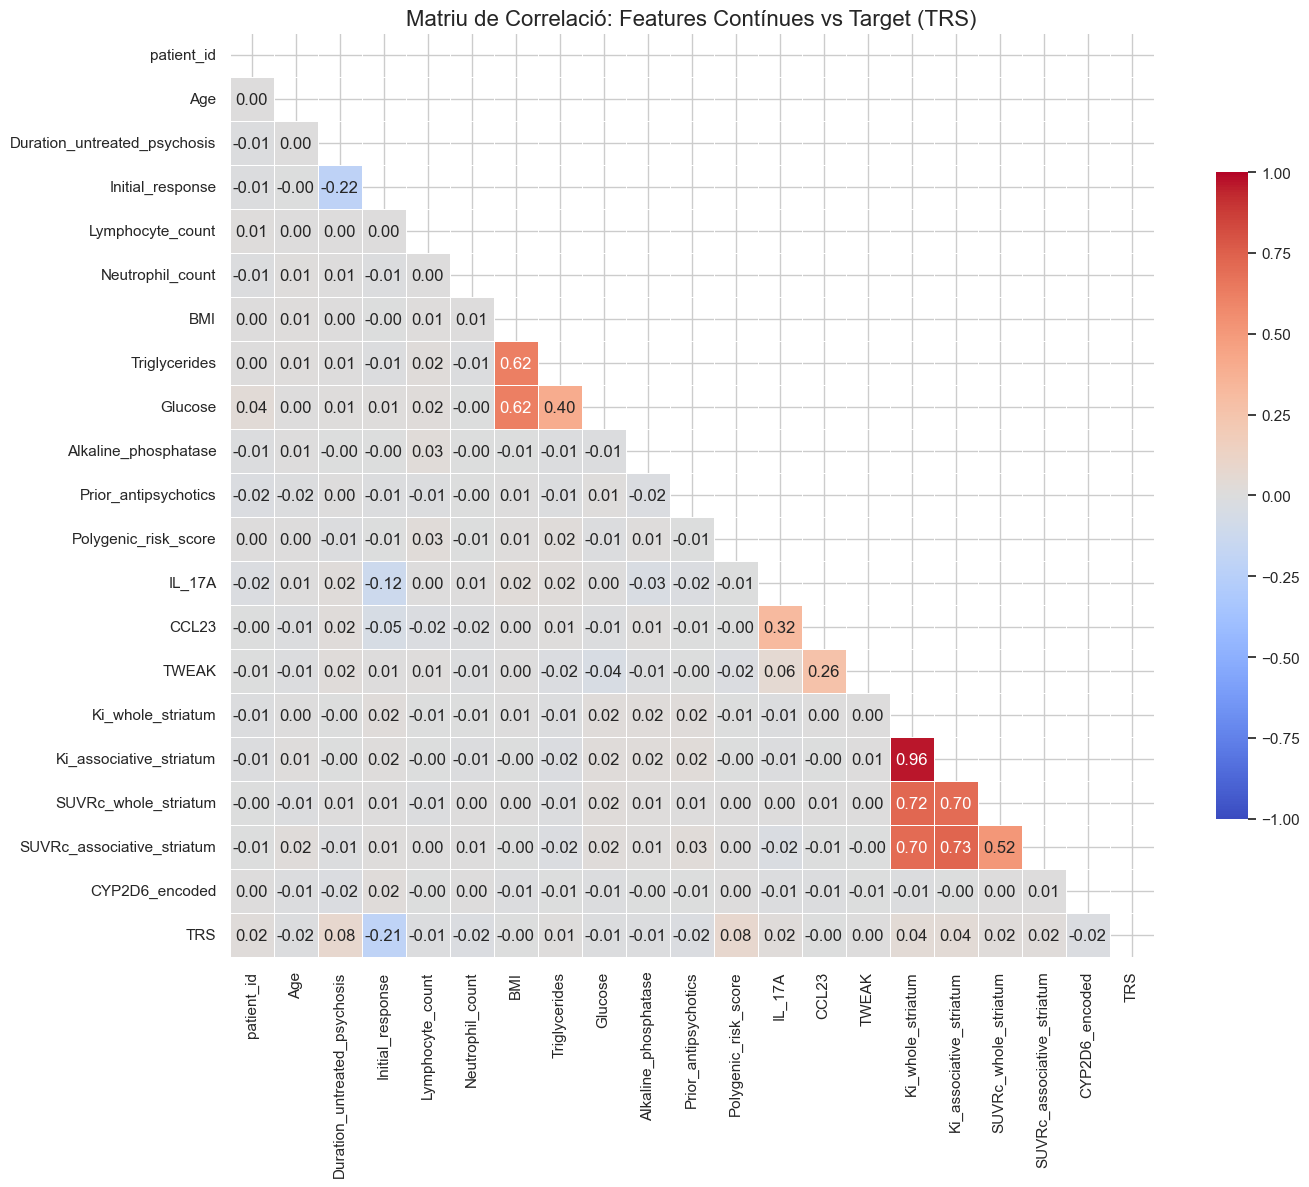

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Preparar dades (Només numèriques CONTÍNUES)
train_corr = X_train.copy()
train_corr['TRS'] = y_train

# FILTRE: Ens quedem només amb columnes que tinguin MÉS de 2 valors únics
# Això elimina automàticament totes les binàries (0/1) com Sex, Dummies, etc.
continuous_cols = [col for col in train_corr.columns if train_corr[col].nunique() > 2]

# Assegurem que incloem 'TRS' encara que sigui binària, per veure la correlació amb l'objectiu
if 'TRS' not in continuous_cols:
    continuous_cols.append('TRS')

numeric_df = train_corr[continuous_cols]

print(f"Analitzant correlació de {len(continuous_cols)} variables contínues (binàries excloses).")

# 2. Calcular la matriu de correlació (Mètode Pearson)
corr_matrix = numeric_df.corr()

# 3. Visualitzar el Mapa de Calor (Heatmap)
plt.figure(figsize=(16, 12))  # Ajustem mida perquè ara hi haurà menys variables

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .7})

plt.title('Matriu de Correlació: Features Contínues vs Target (TRS)', fontsize=16)
plt.show()



Eliminem doncs les variables altament correlacionades:

- `Ki_associative_striatum`
- `SUVRc_associative_striatum`
- `Triglycerides`
- `BMI`


In [122]:
# eliminem les variables altament correlacionades
cols_to_remove = ['Ki_associative_striatum', 'SUVRc_associative_striatum', 'Triglycerides', 'BMI']
X_train = X_train.drop(columns=cols_to_remove, errors='ignore')
X_val = X_val.drop(columns=cols_to_remove, errors='ignore')

### 2.4 Anàlisi de components principals (PCA)

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Importantíssim!
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparar i Netejar dades
# Seleccionem només numèriques
X_pca_input = X_train.select_dtypes(include=[np.number])

# ATENCIÓ: Assegurem que NO hi ha IDs ni la target 'TRS'
cols_to_exclude = ['Patient_ID', 'id', 'TRS'] # Afegeix qualsevol ID que tinguis
X_pca_input = X_pca_input.drop(columns=[c for c in cols_to_exclude if c in X_pca_input.columns], errors='ignore')

# 2. ESCALAR DADES (La clau per arreglar el gràfic pla)
# Encara que ho hagis fet abans, fer-ho aquí assegura que el PCA rep el que necessita
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca_input)

# 3. Ajustar PCA
pca = PCA()
pca.fit(X_scaled_pca)

# 4. Calcular Variança Explicada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.arange(1, len(cumulative_variance) + 1)

# 5. Visualitzar Gràfic (Correcte)
plt.figure(figsize=(10, 6))
plt.plot(n_components, cumulative_variance, marker='o', linestyle='-', color='b', label='Variança Acumulada')

# Línia 95%
plt.axhline(y=0.95, color='r', linestyle='--', label='Llindar 95%')

# Trobar punt de tall
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=n_components_95, color='r', linestyle='--', alpha=0.7)

plt.title('PCA: Variança Explicada (Amb dades escalades)', fontsize=14)
plt.xlabel('Número de Components', fontsize=12)
plt.ylabel('Variança Acumulada', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.show()

# 6. Resultats
print(f"Variables originals: {X_pca_input.shape[1]}")
print(f"Components per al 95%: {n_components_95}")


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### 2.5 Preparació de les dades trs_eval.csv per a generar submissions amb el millor model entrenat

Aplicarem tots els canvis fets al dataset d'entrenament (recodificació, imputació, eliminació de variables, normalització) a les dades de `trs_eval.csv` per assegurar-nos que estan en el mateix format i escala que les dades utilitzades per entrenar els models.

In [ ]:
df_eval = pd.read_csv('trs_eval.csv')
eval_ids = df_eval.get('Patient_ID', df_eval.get('id', df_eval.index)).copy()
df_eval = df_eval.drop(columns=['Patient_ID', 'id'], errors='ignore')

# Mapatge CYP2D6
if 'CYP2D6_metabolic_phenotype' in df_eval.columns:
    df_eval['CYP2D6_encoded'] = df_eval['CYP2D6_metabolic_phenotype'].map(cyp2d6_mapping)
    df_eval = df_eval.drop(columns=['CYP2D6_metabolic_phenotype'])

# One-hot Ethnicity amb mateixes categories que el train
ethnicity_train_cols = [c for c in X_train.columns if c.startswith('is_')]
ethnicity_categories = [c.replace('is_', '') for c in ethnicity_train_cols]
if 'Ethnicity' in df_eval.columns:
    eth_dummies = pd.get_dummies(df_eval['Ethnicity'], prefix='is', dtype=int)
    df_eval = pd.concat([df_eval.drop(columns=['Ethnicity']), eth_dummies], axis=1)
else:
    df_eval = df_eval.copy()
for col in ethnicity_train_cols:
    if col not in df_eval.columns:
        df_eval[col] = 0
extra_eth = [c for c in df_eval.columns if c.startswith('is_') and c not in ethnicity_train_cols]
if extra_eth:
    df_eval = df_eval.drop(columns=extra_eth)

# Eliminar les columnes eliminades al train
cols_to_remove = ['Ki_associative_striatum', 'SUVRc_associative_striatum', 'Triglycerides']
df_eval = df_eval.drop(columns=cols_to_remove, errors='ignore')

# Imputació per mediana del train (post-SMOTE)
numeric_cols_eval = [c for c in numeric_cols if c in df_eval.columns]
median_map = X_train[numeric_cols_eval].median()
df_eval[numeric_cols_eval] = df_eval[numeric_cols_eval].apply(pd.to_numeric, errors='coerce')
df_eval[numeric_cols_eval] = df_eval[numeric_cols_eval].fillna(median_map)

# Assegurar coincidència de columnes amb el train
train_columns = X_train.columns
for col in train_columns:
    if col not in df_eval.columns:
        df_eval[col] = 0
df_eval = df_eval[train_columns]

# Escalat amb el scaler entrenat
df_eval[numeric_cols] = scaler.transform(df_eval[numeric_cols])

## 3. Ajustament de Models

### 3.1 Ajustament SVM

In [49]:
from sklearn.model_selection import PredefinedSplit
import numpy as np


# GridSearch amb el teu split personalitzat
param_grid = {
    'kernel': ['rbf'],  
    'C': [1000],  # ← Prova valors més alts
    'gamma': ['scale'],
    'class_weight': ['balanced']
}

print("Iniciant GridSearch amb validació predefinida...")

svm_grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',              # ← Usa el teu split train/val
    n_jobs=-1,
    verbose=2
)

# Entrenar amb tot el dataset combinat
svm_grid.fit(X_train,y_train)

best_svm = svm_grid.best_estimator_
print("\n" + "="*50)
print(f"MILLOR MODEL (validat amb el teu val set):")
print(f"Paràmetres: {svm_grid.best_params_}")
print(f"F1-Macro (val set): {svm_grid.best_score_:.3f}")
print("="*50)


Iniciant GridSearch amb validació predefinida...
Fitting 5 folds for each of 1 candidates, totalling 5 fits

MILLOR MODEL (validat amb el teu val set):
Paràmetres: {'C': 1000, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
F1-Macro (val set): 0.674


In [67]:
# f1_macro i matriu de confusió al val set

# Remove patient_id from X_val
if 'patient_id' in X_val.columns:
    X_val = X_val.drop('patient_id', axis=1)

# Now predict
y_val_pred = best_svm.predict(X_val)


y_val_pred = best_svm.predict(X_val)
f1_macro_val = f1_score(y_val, y_val_pred, average='macro')
print(f"\nF1-Macro al conjunt de validació: {f1_macro_val:.3f}\n")
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Matriu de Confusió al conjunt de validació:")
print(conf_matrix)


F1-Macro al conjunt de validació: 0.561

Matriu de Confusió al conjunt de validació:
[[953 265]
 [366 186]]


### 3.2 Ajustament XGBoost

Farem un GridSearch per trobar els millors hiperparàmetres per al model XGBoost. Els hiperparàmetres que ajustarem són:

- `n_estimators`: Nombre d'arbres en el model.
- `max_depth`: Profunditat màxima de cada arbre.
- `learning_rate`: Taxa d'aprenentatge que controla la contribució de cada arbre.
- `scale_pos_weight`: Pes per equilibrar les classes en cas de desbalanceig.


In [87]:
# 3.2 Ajustament XGBoost

# 1. Definir el model base
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Per classificació binària
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1  # Utilitza tots els nuclis per a l'entrenament de cada arbre
)

# 2. Definir la graella d'hiperparàmetres a explorar
# Nota: 'scale_pos_weight' idealment és ratio_negatius / ratio_positius.
# Com que el teu dataset té ~31.5% de classe positiva, un valor de referència és ~2.17.
param_grid = {
    'n_estimators': [300],        # Nombre d'arbres
    'max_depth': [5,6,7,8],                 # Profunditat (evitar valors molt alts per no fer overfitting)
    'learning_rate': [0.1,0.15],      # Pas d'aprenentatge (eta)
    'scale_pos_weight': [4]           # Pes per a la classe minoritària (TRS=1)
}

# 3. Configurar el GridSearch
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',       # Important: optimitzem F1-score donat el desbalanceig
    cv=5,               # Validació creuada de 5 particions
    verbose=2,          # Per veure el progrés
    n_jobs=-1           # Paral·lelització del GridSearch
)

# 4. Entrenar el model amb la cerca (Assegura't d'usar les dades correctes, ex: X_train_smote si n'hi ha)
print("Iniciant GridSearch per XGBoost...")
grid_search.fit(X_train, y_train)

# 5. Mostrar els millors resultats
print("\n--- Resultats del GridSearch ---")
print(f"Millors hiperparàmetres: {grid_search.best_params_}")
print(f"Millor F1-score (validació creuada): {grid_search.best_score_:.4f}")

# 6. Guardar el millor model
best_xgb = grid_search.best_estimator_


Iniciant GridSearch per XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

--- Resultats del GridSearch ---
Millors hiperparàmetres: {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 300, 'scale_pos_weight': 4}
Millor F1-score (validació creuada): 0.7028


In [91]:
# matriu de confusió al val set
y_val_pred_xgb = best_xgb.predict(X_val)
f1_macro_val_xgb = f1_score(y_val, y_val_pred_xgb, average='macro')
print(f"\nF1-Macro al conjunt de validació (XGBoost): {f1_macro_val_xgb:.3f}\n")
conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_xgb)
print("Matriu de Confusió al conjunt de validació (XGBoost):")
print(conf_matrix_xgb)
print("\n--- Informe de Classificació XGBoost al conjunt de validació ---")
print(classification_report(y_val, y_val_pred_xgb))


F1-Macro al conjunt de validació (XGBoost): 0.539

Matriu de Confusió al conjunt de validació (XGBoost):
[[828 390]
 [330 222]]

--- Informe de Classificació XGBoost al conjunt de validació ---
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1218
           1       0.36      0.40      0.38       552

    accuracy                           0.59      1770
   macro avg       0.54      0.54      0.54      1770
weighted avg       0.61      0.59      0.60      1770

